### Prophet是facebook開發的開源時間序列預測演算法，他考量了趨勢、季節性、特殊假日的因素進行準確的時間序列預測，支援自定義節日假日的影響。

### 安裝套件
- 一開始是使用 pip install fbprophet 安裝套件，但一直安裝失敗
- https://stackoverflow.com/questions/42822902/can-someone-help-me-in-installing-python-package-prophet-on-windows-10/47522618
- 應該是python版本有衝突，所以改用python 3.6版
- 執行 在anaconda 輸入 conda install -c conda-forge fbprophet 後，安裝成功

### 測試是否安裝成功

In [1]:
# check prophet version
import fbprophet
# print version number
print('Prophet %s' % fbprophet.__version__)

Importing plotly failed. Interactive plots will not work.


Prophet 0.7.1


### 讀取交易資料

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('../transaction_data_version3.csv')

In [4]:
df

,household_key,MEMBER,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,WEEK_NO,DAY,DATE,hour_time
0,2375,0,26984851472,1004906,1,1.39,1,1,2019-07-30,16:00:00
1,1929,1,27021022215,1004906,1,1.39,1,4,2019-08-02,17:00:00
2,568,0,27021090189,1004906,1,1.39,1,4,2019-08-02,00:00:00
3,887,0,27031467254,1004906,1,1.39,1,5,2019-08-03,15:00:00
4,175,0,27057508267,1004906,1,1.99,2,7,2019-08-05,23:00:00
...,...,...,...,...,...,...,...,...,...,...
2551702,1598,0,42305362535,92130,1,0.99,102,711,2021-07-09,15:00:00
2551703,1598,0,42305362535,114102,1,8.89,102,711,2021-07-09,15:00:00
2551704,1598,0,42305362535,133449,1,6.99,102,711,2021-07-09,15:00:00
2551705,1598,0,42305362535,6923644,1,4.50,102,711,2021-07-09,15:00:00


### 讀取產品資料

In [5]:
product_df = pd.read_csv('../product.csv')

In [6]:
product_df

,PRODUCT_ID,MANUFACTURER,DEPARTMENT,BRAND,COMMODITY_DESC,SUB_COMMODITY_DESC,CURR_SIZE_OF_PRODUCT
0,25671,2,GROCERY,National,FRZN ICE,ICE - CRUSHED/CUBED,22 LB
1,26081,2,MISC. TRANS.,National,NO COMMODITY DESCRIPTION,NO SUBCOMMODITY DESCRIPTION,
2,26093,69,PASTRY,Private,BREAD,BREAD:ITALIAN/FRENCH,
3,26190,69,GROCERY,Private,FRUIT - SHELF STABLE,APPLE SAUCE,50 OZ
4,26355,69,GROCERY,Private,COOKIES/CONES,SPECIALTY COOKIES,14 OZ
...,...,...,...,...,...,...,...
92348,18293142,6384,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,
92349,18293439,6393,DRUG GM,National,BOOKSTORE,CHILDRENS LOW END,
92350,18293696,6406,DRUG GM,National,BOOKSTORE,PAPERBACK BEST SELLER,
92351,18294080,6442,DRUG GM,National,BOOKSTORE,PAPERBACK BOOKS,


In [7]:
product_df1 = product_df[['PRODUCT_ID','SUB_COMMODITY_DESC']]

### 將交易與產品資料合併

In [8]:
df_merge = df.merge(product_df1,on='PRODUCT_ID')

In [9]:
df_merge

,household_key,MEMBER,BASKET_ID,PRODUCT_ID,QUANTITY,SALES_VALUE,WEEK_NO,DAY,DATE,hour_time,SUB_COMMODITY_DESC
0,2375,0,26984851472,1004906,1,1.39,1,1,2019-07-30,16:00:00,POTATOES RUSSET (BULK&BAG)
1,1929,1,27021022215,1004906,1,1.39,1,4,2019-08-02,17:00:00,POTATOES RUSSET (BULK&BAG)
2,568,0,27021090189,1004906,1,1.39,1,4,2019-08-02,00:00:00,POTATOES RUSSET (BULK&BAG)
3,887,0,27031467254,1004906,1,1.39,1,5,2019-08-03,15:00:00,POTATOES RUSSET (BULK&BAG)
4,175,0,27057508267,1004906,1,1.99,2,7,2019-08-05,23:00:00,POTATOES RUSSET (BULK&BAG)
...,...,...,...,...,...,...,...,...,...,...,...
2551702,1598,0,42305362535,92130,1,0.99,102,711,2021-07-09,15:00:00,MARGARINE: TUBS AND BOWLS
2551703,1598,0,42305362535,114102,1,8.89,102,711,2021-07-09,15:00:00,BEERALEMALT LIQUORS
2551704,1598,0,42305362535,133449,1,6.99,102,711,2021-07-09,15:00:00,BEERALEMALT LIQUORS
2551705,1598,0,42305362535,6923644,1,4.50,102,711,2021-07-09,15:00:00,BEERALEMALT LIQUORS


### 藉由SUB_COMMODITY_DESC欄位進行group by，並計算每一組QUANTITY的總和

In [10]:
df_merge.groupby('SUB_COMMODITY_DESC')['QUANTITY'].sum().sort_values()

SUB_COMMODITY_DESC
*ATH ACCES:TOWEL BARS/SOAP D          1
LUNCHMEAT-RW-ALL                      1
LUBRICANTS/CLEANERS                   1
LOTTO/GAMBLING-MAGAZINE               1
SEASONAL BARBIE                       1
                                  ...  
CANDY BARS (SINGLES)(INCLUDING    46285
SFT DRNK 2 LITER BTL CARB INCL    54432
SOFT DRINKS 12/18&15PK CAN CAR    55022
YOGURT NOT MULTI-PACKS            66198
FLUID MILK WHITE ONLY             91476
Name: QUANTITY, Length: 2362, dtype: int64

### 目的 : 針對商品FLUID MILK WHITE ONLY 進行時間序列預測

In [11]:
df_milk = df_merge.query('SUB_COMMODITY_DESC == "FLUID MILK WHITE ONLY"')

### 僅選擇 DATE 與 QUANTITY欄位

In [12]:
df_milk_1 = df_milk[['DATE','QUANTITY']]

In [13]:
df_milk_1

,DATE,QUANTITY
64006,2019-07-30,1
64007,2019-08-01,1
64008,2019-08-01,1
64009,2019-07-31,1
64010,2019-08-01,1
...,...,...
2542642,2021-04-26,2
2542643,2021-06-12,2
2542644,2021-07-06,1
2549693,2021-06-18,1


### 藉由DATE欄位進行group by，並計算每一組QUANTITY的總和

In [14]:
df_milk_1 = df_milk_1.groupby('DATE')['QUANTITY'].sum().reset_index()

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 資料選擇
- 完整資料
- 日期介於'2020-06-01', '2021-06-30'的資料

### 使用所有的data

In [15]:
df_milk_1

,DATE,QUANTITY
0,2019-07-30,2
1,2019-07-31,6
2,2019-08-01,13
3,2019-08-02,13
4,2019-08-03,8
...,...,...
704,2021-07-05,94
705,2021-07-06,104
706,2021-07-07,107
707,2021-07-08,108


### 只取一段期間

In [16]:
#start_date, end_date = '2020-06-01', '2021-06-30'
#df_milk_1 = df_milk_1.query('DATE >= @start_date and DATE <= @end_date')

### ------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Prophet 模型限制
- 資料的日期欄位名稱必須要命名為 ds，形態須為日期格式，且資料格式應為 YYYY-MM-DD 或 YYYY-MM-DD HH:MM:SS
- 資料的數值欄位必須要命名為y，形態須為數值

### 把資料整理成符合條件的樣子

In [17]:
from pandas import to_datetime

df_milk_1['DATE']= to_datetime(df_milk_1['DATE'])

In [18]:
import datetime as dt
df_milk_1['DATE'] = df_milk_1['DATE'].dt.strftime('%Y-%m-%d')  

In [19]:
df_milk_2 = df_milk_1.groupby('DATE')['QUANTITY'].sum().reset_index()

In [20]:
df_milk_2.columns = ['ds','y']

In [21]:
df_milk_3 = df_milk_2.copy()

In [22]:
df_milk_3

,ds,y
0,2019-07-30,2
1,2019-07-31,6
2,2019-08-01,13
3,2019-08-02,13
4,2019-08-03,8
...,...,...
704,2021-07-05,94
705,2021-07-06,104
706,2021-07-07,107
707,2021-07-08,108


### 取對數
- 在統計學中為什麼要對變數取對數
- 原因是
 - (1) 時間序列和麵板資料, 都要做平穩的單位根檢驗, 取對數一般能使序列平穩(stationary), 不然就取差分進行平穩.

 - (2) 能使模型的殘差呈現隨機的特性, 而不是趨勢或者截距.

 - (3) 減少共線性和異方差(heteroscedasticity)出現的概率

 - (4) 有經濟學意義上, 比如增長率, 變化率和彈性.

 - (5) 統計學認為變數具有內在的指數增長的趨勢, 取對數可以讓聯合分佈 (對應的F-statistics)呈現正態

In [23]:
import numpy as np
df_milk_3['y'] = np.log(df_milk_3['y'])

### 建立Prophet 模型
- 官方認為Prophet()可調整的參數設定
 - changepoint_prior_scale：這可能是最有影響的參數。它決定了趨勢的靈活性，特別是趨勢在趨勢變化點的變化程度。如本文檔中所述，如果它太小，則趨勢將欠擬合，並且本應使用趨勢變化建模的方差最終將使用噪聲項進行處理。如果它太大，趨勢將過度擬合，在最極端的情況下，您最終會得到捕捉年度季節性的趨勢。默認值 0.05 適用於許多時間序列，但可以調整；[0.001, 0.5] 的範圍可能是正確的。像這樣的參數（正則化懲罰；這實際上是套索懲罰）通常在對數尺度上進行調整。
 - seasonality_prior_scale：該參數控制季節性的靈活性。同樣，較大的值允許季節性適應較大的波動，較小的值會縮小季節性的幅度。默認為 10.，基本不應用正則化。那是因為我們在這裡很少看到過度擬合（存在固有的正則化，因為它是用截斷的傅立葉級數建模的，所以它本質上是低通濾波的）。調整它的合理範圍可能是 [0.01, 10]；當設置為 0.01 時，您應該會發現季節性的幅度非常小。這在對數尺度上也可能有意義，因為它實際上是像嶺回歸一樣的 L2 懲罰。
 - holidays_prior_scale：這可以控制適應假日效果的靈活性。與seasonity_prior_scale 類似，它默認為10.0，基本上不適用正則化，因為我們通常對假期有多個觀察，並且可以很好地估計它們的影響。這也可以在 [0.01, 10] 的範圍內進行調整，就像與seasonality_prior_scale 一樣。
 - seasonality_mode: 選項是 [ 'additive', 'multiplicative']。默認為'additive'，但許多業務時間序列將具有乘法季節性。最好僅通過查看時間序列並查看季節性波動的幅度是否隨著時間序列的幅度而增長（請參閱此處關於乘法季節性的文檔）來最好地確定，但如果不可能，則可以對其進行調整。
- 其他參數
 - 官方文件: https://facebook.github.io/prophet/docs/diagnostics.html#hyperparameter-tuning


- 自定義季節性
 - model.add_seasonality()
 - Prophet will by default fit weekly and yearly seasonalities, if the time series is more than two cycles long. 
 - It will also fit daily seasonality for a sub-daily time series. You can add other seasonalities (monthly, quarterly, hourly) using the add_seasonality method (Python) or function (R). 
 - The inputs to this function are a name, the period of the seasonality in days, and the Fourier order for the seasonality. For reference, by default Prophet uses a Fourier order of 3 for weekly seasonality and 10 for yearly seasonality.

In [24]:
from fbprophet import Prophet
#model = Prophet()
model = Prophet(changepoint_prior_scale=0.1,seasonality_prior_scale=0.1)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)
forecast = model.fit(df_milk_3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### model.make_future_dataframe
- 使用model.make_future_dataframe()可以依照原始資料建立出一個獨立且具有日期資料的dataframe。
- periods為0，僅製造出具有原始資料的日期資料
- periods為 x ，會依照freq所給的單位(DAY : 'D',MONTH: 'M',YEAR:"Y")，對原始資料的最後一筆資料開始累加 
- https://facebook.github.io/prophet/docs/quick_start.html#python-api

In [25]:
future = model.make_future_dataframe(periods=5,freq='D')

In [26]:
future

,ds
0,2019-07-30
1,2019-07-31
2,2019-08-01
3,2019-08-02
4,2019-08-03
...,...
709,2021-07-10
710,2021-07-11
711,2021-07-12
712,2021-07-13


### 將future丟進model裡面預測

In [27]:
forecast = model.predict(future)

### 將預測的資料拆分成3張圖顯示
### If you want to see the forecast components, you can use the Prophet.plot_components method. 
### By default you’ll see the trend, yearly seasonality, and weekly seasonality of the time series.
- https://facebook.github.io/prophet/docs/non-daily_data.html

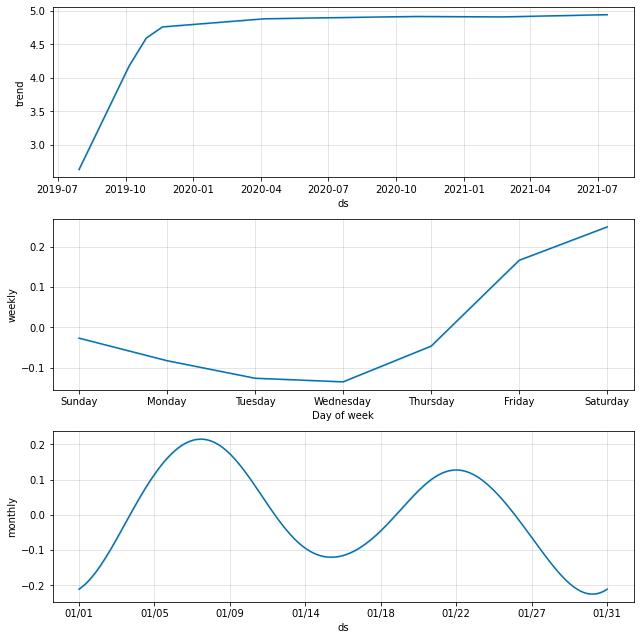

In [28]:
fig = model.plot_components(forecast)

### 預測的結果會包含日期(ds), 預測值(yhat), 預測誤差下限(yhat_lower), 預測誤差上限(yhat_upper)等資料

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,monthly,monthly_lower,monthly_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-07-30,2.627215,2.107095,2.905748,2.627215,2.627215,-0.114970,-0.114970,-0.114970,0.010563,0.010563,0.010563,-0.125533,-0.125533,-0.125533,0.0,0.0,0.0,2.512244
1,2019-07-31,2.650112,2.054975,2.858498,2.650112,2.650112,-0.189047,-0.189047,-0.189047,-0.054565,-0.054565,-0.054565,-0.134482,-0.134482,-0.134482,0.0,0.0,0.0,2.461065
2,2019-08-01,2.673009,2.089532,2.890658,2.673009,2.673009,-0.167320,-0.167320,-0.167320,-0.121167,-0.121167,-0.121167,-0.046153,-0.046153,-0.046153,0.0,0.0,0.0,2.505690
3,2019-08-02,2.695906,2.279848,3.072137,2.695906,2.695906,-0.013420,-0.013420,-0.013420,-0.179501,-0.179501,-0.179501,0.166081,0.166081,0.166081,0.0,0.0,0.0,2.682486
4,2019-08-03,2.718804,2.346764,3.135983,2.718804,2.718804,0.031547,0.031547,0.031547,-0.217102,-0.217102,-0.217102,0.248650,0.248650,0.248650,0.0,0.0,0.0,2.750351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2021-07-10,4.945003,4.931429,5.659986,4.945003,4.945003,0.337093,0.337093,0.337093,0.088444,0.088444,0.088444,0.248650,0.248650,0.248650,0.0,0.0,0.0,5.282096
710,2021-07-11,4.945238,4.676885,5.471157,4.945238,4.945238,0.128979,0.128979,0.128979,0.155386,0.155386,0.155386,-0.026407,-0.026407,-0.026407,0.0,0.0,0.0,5.074217
711,2021-07-12,4.945473,4.658007,5.446484,4.945473,4.945473,0.116662,0.116662,0.116662,0.198819,0.198819,0.198819,-0.082157,-0.082157,-0.082157,0.0,0.0,0.0,5.062135
712,2021-07-13,4.945708,4.646738,5.441255,4.945708,4.945708,0.089080,0.089080,0.089080,0.214613,0.214613,0.214613,-0.125533,-0.125533,-0.125533,0.0,0.0,0.0,5.034788


            ds      yhat  yhat_lower  yhat_upper
0   2019-07-30  2.512244    2.107095    2.905748
1   2019-07-31  2.461065    2.054975    2.858498
2   2019-08-01  2.505690    2.089532    2.890658
3   2019-08-02  2.682486    2.279848    3.072137
4   2019-08-03  2.750351    2.346764    3.135983
..         ...       ...         ...         ...
709 2021-07-10  5.282096    4.931429    5.659986
710 2021-07-11  5.074217    4.676885    5.471157
711 2021-07-12  5.062135    4.658007    5.446484
712 2021-07-13  5.034788    4.646738    5.441255
713 2021-07-14  5.012035    4.633581    5.411752

[714 rows x 4 columns]


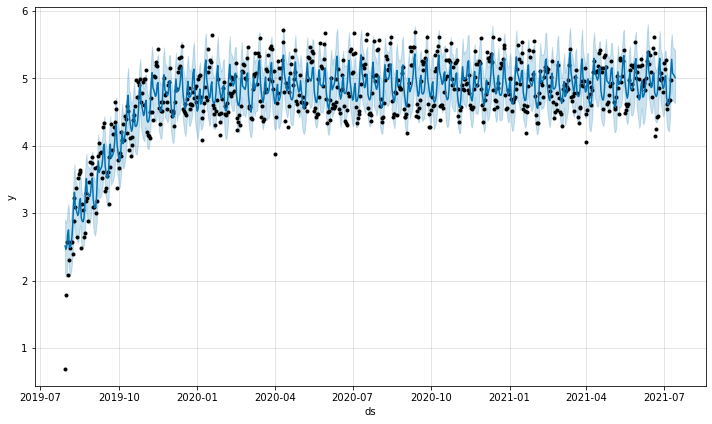

In [30]:
import matplotlib.pyplot as plt
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])
# plot forecast
model.plot(forecast)
plt.show()

In [31]:
two_years_AE = (forecast.yhat - df_milk_3.y)

two_years_AE.describe()

count    709.000000
mean      -0.000035
std        0.307245
min       -0.805764
25%       -0.240865
50%        0.021224
75%        0.221405
max        1.819097
dtype: float64

### 透過sklearn.metrics，進行均方誤差(MSE)的運算

In [32]:
from sklearn import metrics
print ("MSE:",metrics.mean_squared_error(forecast.yhat, df_milk_3.y))


ValueError: Found input variables with inconsistent numbers of samples: [714, 709]

### 一開始，有對資料進行取對數，因此對預測的結果取指數。

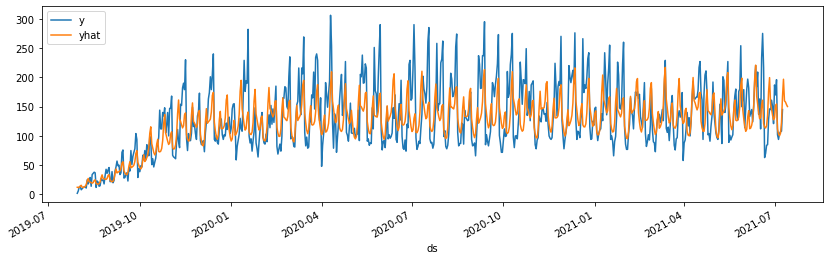

In [33]:
df_2492_close = pd.DataFrame(df_milk_2[['ds','y']])
two_years = forecast.set_index('ds').join(df_2492_close.set_index('ds'))
two_years = two_years[['y', 'yhat', 'yhat_upper', 'yhat_lower' ]]
two_years['yhat']=np.exp(two_years.yhat)
two_years['yhat_upper']=np.exp(two_years.yhat_upper)
two_years['yhat_lower']=np.exp(two_years.yhat_lower)

two_years[['y', 'yhat']].plot(figsize=(14, 4));

### 把預測誤差上下限加入圖中

Text(0.5, 0, 'Date')

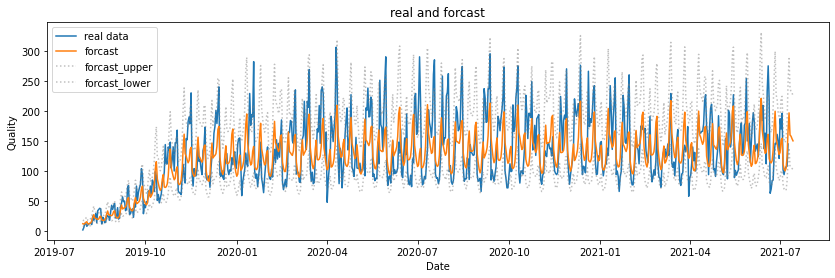

In [34]:
fig, ax1 = plt.subplots(figsize=(14, 4))
ax1.plot(two_years['y'],label = "real data")
ax1.plot(two_years.yhat,label = "forcast")
ax1.plot(two_years.yhat_upper, color='gray',  linestyle=':', alpha=0.5, label = "forcast_upper")
ax1.plot(two_years.yhat_lower, color='gray',  linestyle=':', alpha=0.5, label = "forcast_lower")

plt.legend(loc='best')
ax1.set_title('real and forcast')
ax1.set_ylabel('Quality')
ax1.set_xlabel('Date')